###Name: Kaushik Biswas
###ID:19-40034-1
###Mid Project 


In [1]:
pip install cifar10

In [2]:
!ls

sample_data


In [3]:
!git clone https://github.com/nholmber/google-colab-cs231n.git

Cloning into 'google-colab-cs231n'...
remote: Enumerating objects: 109, done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 109
Receiving objects: 100% (109/109), 5.07 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [4]:
%cd google-colab-cs231n/assignment1

/content/google-colab-cs231n/assignment1


In [5]:
!pip install imageio

In [6]:
%cd cs231n/datasets/
!ls

/content/google-colab-cs231n/assignment1/cs231n/datasets
get_datasets.sh


In [7]:
!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [8]:
!./get_datasets.sh

--2022-03-13 04:50:34--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  96.7MB/s    in 1.7s    

2022-03-13 04:50:35 (96.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [9]:
%cd ../..
!ls

/content/google-colab-cs231n/assignment1
collectSubmission.sh  README.md		    svm.ipynb
cs231n		      requirements.txt	    two_layer_net_colab.ipynb
features.ipynb	      setup_googlecloud.sh  two_layer_net.ipynb
frameworkpython       softmax.ipynb
knn.ipynb	      start_ipython_osx.sh


In [10]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

import inspect
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import Terminal256Formatter

def pretty_print(func):
  source_code = inspect.getsourcelines(func)[0]
  for line in source_code:
    print(highlight(line.strip('\n'), PythonLexer(), Terminal256Formatter()), end='')
  print('')

In [11]:

cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


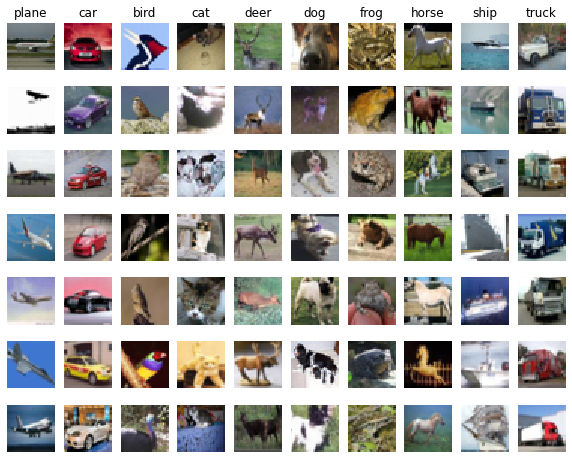

In [12]:


classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
accuracy = []
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
for k in range(1, 21):
  print("k: ", k)
  acc = []
  for f in range(5):
    
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0         

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
        
        
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
    
      values = man_distance[:k, 1]

    
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

      
      if most_frequent_value == validationY[i]:
        cm += 1
        
      
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

    

      if i == 120:
        break

    acc.append([cm/100, ce/100])
  accuracy.append([acc, k])

print(accuracy)

170508288/170498071 [==============================] - 2s 0us/step
k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.18, 0.18], [0.29, 0.21], [0.17, 0.12], [0.24, 0.21], [0.13, 0.14]], 1], [[[0.17, 0.11], [0.21, 0.24], [0.19, 0.15], [0.24, 0.22], [0.16, 0.14]], 2], [[[0.27, 0.12], [0.27, 0.18], [0.18, 0.18], [0.25, 0.18], [0.14, 0.15]], 3], [[[0.2, 0.17], [0.29, 0.29], [0.19, 0.17], [0.2, 0.25], [0.16, 0.18]], 4], [[[0.13, 0.17], [0.25, 0.24], [0.2, 0.18], [0.24, 0.23], [0.12, 0.19]], 5], [[[0.14, 0.16], [0.24, 0.2], [0.21, 0.18], [0.25, 0.2], [0.16, 0.17]], 6], [[[0.16, 0.17], [0.27, 0.22], [0.18, 0.17], [0.25, 0.19], [0.21, 0.2]], 7], [[[0.2, 0.2], [0.28, 0.2], [0.24, 0.18], [0.22, 0.21], [0.2, 0.23]], 8], [[[0.15, 0.16], [0.28, 0.21], [0.22, 0.19], [0.23, 0.21], [0.22, 0.22]], 9], [[[0.17, 0.15], [0.27, 0.24], [0.22, 0.2], [0.27, 0.24], [0.25, 0.22]], 10], [[[0.19, 0.13], [0.26, 0.19], [0.23, 0.22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


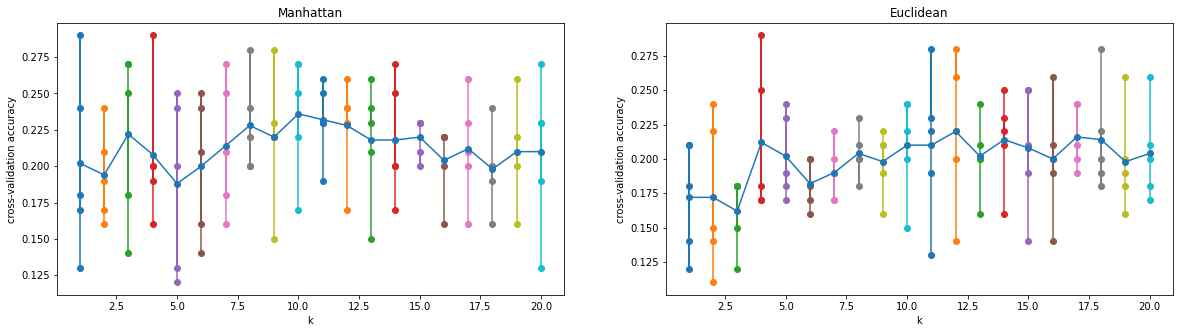

In [14]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Manhattan')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  avg1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2)
plt.title('Euclidean')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()

In [15]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [16]:

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [17]:
from cs231n.classifiers import KNearestNeighbor
 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)


In [18]:


pretty_print(classifier.compute_distances_two_loops)


dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)



  def compute_distances_two_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a nested loop over both the training data and the
    test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      for j in range(num_train):
        dists[i, j] = np.linalg.norm(X[i]-self.X_train[j])

    return dists

(500, 5000)


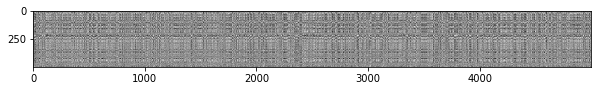

In [19]:

plt.imshow(dists, interpolation='none')
plt.show()

In [20]:

y_test_pred = classifier.predict_labels(dists, k=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 106 / 500 correct => accuracy: 0.212000


In [21]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 105 / 500 correct => accuracy: 0.210000


In [22]:

pretty_print(classifier.compute_distances_one_loop)


dists_one = classifier.compute_distances_one_loop(X_test)

difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Distance matrices are the same')
else:
    print('Distance matrices are different')

  def compute_distances_one_loop(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      # Note axis=1 computes norm along rows
      dists[i] = np.linalg.norm(X[i]-self.X_train, axis=1)

    return dists

Difference was: 0.000000
Distance matrices are the same


In [23]:

pretty_print(classifier.compute_distances_no_loops)


dists_two = classifier.compute_distances_no_loops(X_test)


difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Distance matrices are the same')
else:
    print('Distance matrices are different')

  def compute_distances_no_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]

    # Expand ||x - y||**2 = ||x||**2 - 2 x.T ⋅y + ||y||**2,
    # where ||x||**2 = sum(x**2) (element-wise on matrix rows)
    # The final result is a (num_test, num_train) matrix
    # so the x**2 and y**2 intermediates must be reshaped appropriately
    x2 = np.sum(X**2, axis=1).reshape((num_test, 1))
    y2 = np.sum(self.X_train**2, axis=1).reshape((1, num_train))
    xy = -2*np.matmul(X, self.X_train.T)
    dists = np.sqrt(x2 + xy + y2)

    return dists

Difference was: 11737756.943968
Distance matrices are different


In [24]:

def time_function(f, *args):
 
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)


Two loop version took 26.854179 seconds
One loop version took 28.502729 seconds
No loop version took 6.753907 seconds


### Cross-validation



In [25]:
num_folds = 5
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')


X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []
    
for idx in range(num_folds):
     
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]
   
    classifier = KNearestNeighbor()
    classifier.train(X_train_set, y_train_set)
  
    dists_validate = classifier.compute_distances_no_loops(X_validation_set)
    for k in k_choices:
        
        y_validation_pred = classifier.predict_labels(dists_validate, k=k)
      
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)


for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.099000
k = 1, accuracy = 0.104000
k = 1, accuracy = 0.097000
k = 1, accuracy = 0.098000
k = 1, accuracy = 0.099000
k = 2, accuracy = 0.102000
k = 2, accuracy = 0.100000
k = 2, accuracy = 0.097000
k = 2, accuracy = 0.097000
k = 2, accuracy = 0.099000
k = 3, accuracy = 0.099000
k = 3, accuracy = 0.104000
k = 3, accuracy = 0.097000
k = 3, accuracy = 0.098000
k = 3, accuracy = 0.099000
k = 4, accuracy = 0.102000
k = 4, accuracy = 0.100000
k = 4, accuracy = 0.097000
k = 4, accuracy = 0.097000
k = 4, accuracy = 0.099000
k = 5, accuracy = 0.102000
k = 5, accuracy = 0.098000
k = 5, accuracy = 0.097000
k = 5, accuracy = 0.106000
k = 5, accuracy = 0.099000
k = 6, accuracy = 0.102000
k = 6, accuracy = 0.100000
k = 6, accuracy = 0.097000
k = 6, accuracy = 0.097000
k = 6, accuracy = 0.099000
k = 7, accuracy = 0.102000
k = 7, accuracy = 0.100000
k = 7, accuracy = 0.097000
k = 7, accuracy = 0.097000
k = 7, accuracy = 0.099000
k = 8, accuracy = 0.102000
k = 8, accuracy = 0.100000
k

k = 1, average accuracy = 0.099400
k = 2, average accuracy = 0.099000
k = 3, average accuracy = 0.099400
k = 4, average accuracy = 0.099000
k = 5, average accuracy = 0.100400
k = 6, average accuracy = 0.099000
k = 7, average accuracy = 0.099000
k = 8, average accuracy = 0.099000
k = 9, average accuracy = 0.099000
k = 10, average accuracy = 0.099000
k = 11, average accuracy = 0.099000
k = 12, average accuracy = 0.099000
k = 13, average accuracy = 0.099000
k = 14, average accuracy = 0.098400
k = 15, average accuracy = 0.098400
k = 16, average accuracy = 0.100400
k = 17, average accuracy = 0.100400
k = 18, average accuracy = 0.099400
k = 19, average accuracy = 0.100600
k = 20, average accuracy = 0.101000


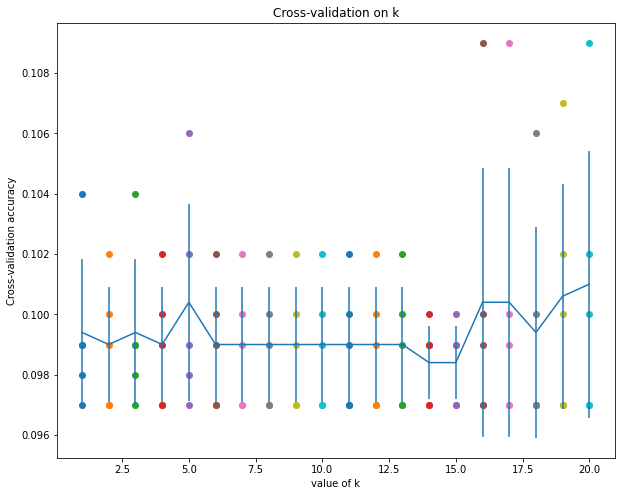

In [26]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)


accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('value of k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [27]:

best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)


num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 57 / 500 correct => accuracy: 0.114000


# Discussion 

### About KNN Algorithm: 
K-nearest neighbors (KNN) is a form of supervised gaining knowledge of set of rules used for each regression and classification. KNN attempts to are expecting the appropriate magnificence for the check information via way of means of calculating the gap among the check information and all of the education factors. Then choose the K quantity of factors that's closet to the check information. The KNN set of rules calculates the possibility of the check information belonging to the instructions of ‘K’ education information and sophistication holds the best possibility may be decided on. In the case of regression, the price is the suggest of the ‘K’ decided on education factors.. 		
 		
##How do we choose the factor K?
First let us try to understand what exactly does K influence in the algorithm. If we see the last example, given that all the 6 training observation remain constant, with a given K value we can make boundaries of each class. These boundaries will segregate RC from GS. In the same way, let’s try to see the effect of value “K” on the class boundaries. The following are the different boundaries separating the two classes with different values of K.

### RESULT & ANALYSIS 

 primarily based totally at the cross-validation results, pick out the satisfactory cost for k
28% acuracy at the take a look at records whilst k=10
best_k = 10
There isn't always any particular way to determine the quality fee for "K", so we need to strive some values to find out the quality out of them. The most favored fee for K is 5 and so For byskip validation fee of K changed into taken as 5. Because a very low fee for K which include K=1 or K=2, can be noisy and reason the outcomes of outliers withinside the model. Finally, after Implementing the set of guidelines, the not unusualplace accuracy we have got had been given is 28%. After plotting the fee for k from 1 to 20, it's miles certainly seen that the form of accuracy is from 21-29%. the satisfactory accuracy came for the fee of K=14 with above 28%. As the accuracy of KNN varies on the dataset, considering the percentage of accuracy its certainly seen that this set of guidelines isn't suitable for the magnificence of the "CIFAR-10" dataset.
Write to Parag Ghosh



